# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [2]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [3]:
edges = [tuple(x) for x in data.values.tolist()]

In [27]:
edges

[('m1', 'a1'),
 ('m2', 'a1'),
 ('m2', 'a2'),
 ('m3', 'a1'),
 ('m3', 'a3'),
 ('m3', 'a4'),
 ('m3', 'a5'),
 ('m3', 'a6'),
 ('m3', 'a7'),
 ('m4', 'a1'),
 ('m4', 'a10'),
 ('m4', 'a8'),
 ('m4', 'a9'),
 ('m5', 'a1'),
 ('m5', 'a11'),
 ('m5', 'a12'),
 ('m5', 'a13'),
 ('m5', 'a14'),
 ('m5', 'a15'),
 ('m5', 'a16'),
 ('m5', 'a17'),
 ('m5', 'a18'),
 ('m5', 'a19'),
 ('m7', 'a21'),
 ('m7', 'a22'),
 ('m8', 'a22'),
 ('m9', 'a22'),
 ('m9', 'a23'),
 ('m10', 'a22'),
 ('m10', 'a24'),
 ('m10', 'a25'),
 ('m11', 'a22'),
 ('m11', 'a26'),
 ('m11', 'a27'),
 ('m11', 'a28'),
 ('m11', 'a29'),
 ('m24', 'a47'),
 ('m25', 'a47'),
 ('m25', 'a48'),
 ('m25', 'a49'),
 ('m25', 'a50'),
 ('m25', 'a51'),
 ('m25', 'a52'),
 ('m25', 'a53'),
 ('m25', 'a54'),
 ('m25', 'a55'),
 ('m25', 'a56'),
 ('m25', 'a57'),
 ('m25', 'a58'),
 ('m25', 'a59'),
 ('m25', 'a60'),
 ('m25', 'a61'),
 ('m25', 'a62'),
 ('m25', 'a63'),
 ('m25', 'a64'),
 ('m25', 'a65'),
 ('m25', 'a66'),
 ('m25', 'a67'),
 ('m25', 'a68'),
 ('m25', 'a69'),
 ('m25', 'a70'),
 ('m

In [4]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [5]:
A=list(B.subgraph(c) for c in nx.connected_components(B))[0]

In [6]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


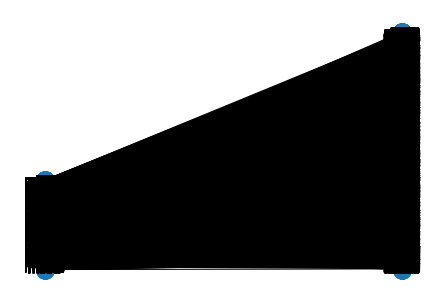

In [7]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [8]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [9]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [31]:
len(walks[1])

100

In [10]:
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5)

In [11]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [71]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

In [72]:
len(node_embeddings)

4703

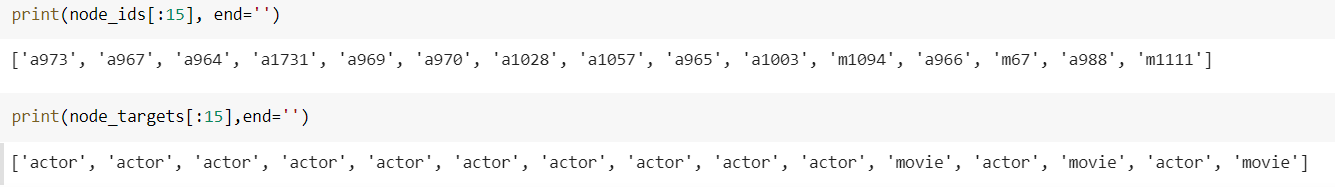

In [14]:
print(node_ids[0:15])
print(node_targets[0:15])


['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1028', 'a1057', 'a965', 'm1094', 'a1003', 'a966', 'a959', 'a988', 'a1037']
['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor']


In [96]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for i in range(len(node_ids)):
        if node_targets[i].startswith('a'):
            actor_embeddings.append(node_embeddings[i])
            actor_nodes.append(node_ids[i])
        else:
            movie_embeddings.append(node_embeddings[i])
            movie_nodes.append(node_ids[i])
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [97]:
actor_nodes=data_split(node_ids,node_targets,node_embeddings)[0]

In [98]:
movie_nodes=data_split(node_ids,node_targets,node_embeddings)[1]

In [99]:
actor_embeddings=data_split(node_ids,node_targets,node_embeddings)[2]

In [100]:
movie_embeddings=data_split(node_ids,node_targets,node_embeddings)[3]

<font color='cyan'>Grader function - 1</font>

In [101]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [102]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [123]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    c=(graph.subgraph(d) for d in nx.connected_components(graph))
    b=(max(c, key=len))
    numbers_connected=b.number_of_nodes()
    total_number_nodes=graph.number_of_nodes()
    cost1=((1/number_of_clusters)*(numbers_connected/total_number_nodes))
    
    return cost1

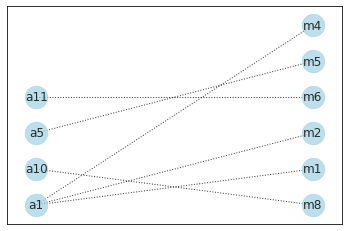

In [38]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [124]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [52]:
gd=graded_graph.degree()
gd=list(gd)
gd

[('a1', 3),
 ('a5', 1),
 ('a10', 1),
 ('a11', 1),
 ('m1', 1),
 ('m2', 1),
 ('m4', 1),
 ('m6', 1),
 ('m5', 1),
 ('m8', 1)]

In [55]:
sum=0
for i in gd:
    sum+=i[1]
sum

12

In [121]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    degree_sum=0
    movie_nodes=0
    degrees=graph.degree()
    for i in list(degrees):
        if 'a' in i[0]:
            degree_sum+=i[1]
    for i in list(degrees):
        if 'm' in i[0]:
            movie_nodes+=1
    cost2=(1/number_of_clusters)*(degree_sum/movie_nodes) 
    
    return cost2

<font color='cyan'>Grader function - 4</font>

In [122]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [60]:
from sklearn.cluster import KMeans

In [70]:
len(movie_embeddings)

6076276

In [132]:
num_of_clusters=[3, 5, 10, 30, 50, 100, 200, 500]
for i in num_of_clusters:
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(np.array(actor_embeddings))
    labels=kmeans.labels_
    cost_1=0
    cost_2=0
    for j in range(i):
        ld=[]
        actor_cluster=set()
        movie_cluster=set()
        for index, label in enumerate(labels):
            if label==j:
                ld.append(nx.ego_graph(B,actor_nodes[index]).edges)
        all_edges = [tuple(k) for l in range(len(ld)) for k in ld[l]]

        for k,l in all_edges:
            if 'm' in k:
                movie_cluster.add(k)
                actor_cluster.add(l)
            else:
                actor_cluster.add(k)
                actor_cluster.add(l)
        
        
        sub_graph= nx.Graph()
        sub_graph.add_nodes_from(actor_cluster, bipartite=0) # Add the node attribute "bipartite"
        sub_graph.add_nodes_from(movie_cluster, bipartite=1)
        sub_graph.add_edges_from(all_edges)

        conn_components = [sub_graph.subgraph(c) for c in nx.connected_components(sub_graph)]
        cost_1+=cost1(sub_graph,i)
        cost_2+=cost2(sub_graph,i)
    cost_1/=i
    cost_2/=i
    print('For k={} the value of cost is {}'.format(i, cost_1*cost_2))
        

For k=3 the value of cost is 0.4132862218909536
For k=5 the value of cost is 0.11457783666363607
For k=10 the value of cost is 0.021762026112034837
For k=30 the value of cost is 0.0019464859251647475
For k=50 the value of cost is 0.0006197226487364581
For k=100 the value of cost is 0.00015914389656152513
For k=200 the value of cost is 4.1594124365060014e-05
For k=500 the value of cost is 7.154145731659597e-06


Optimal number of clusters for max cost are 500

<font color='blue'>Displaying similar actor clusters</font>

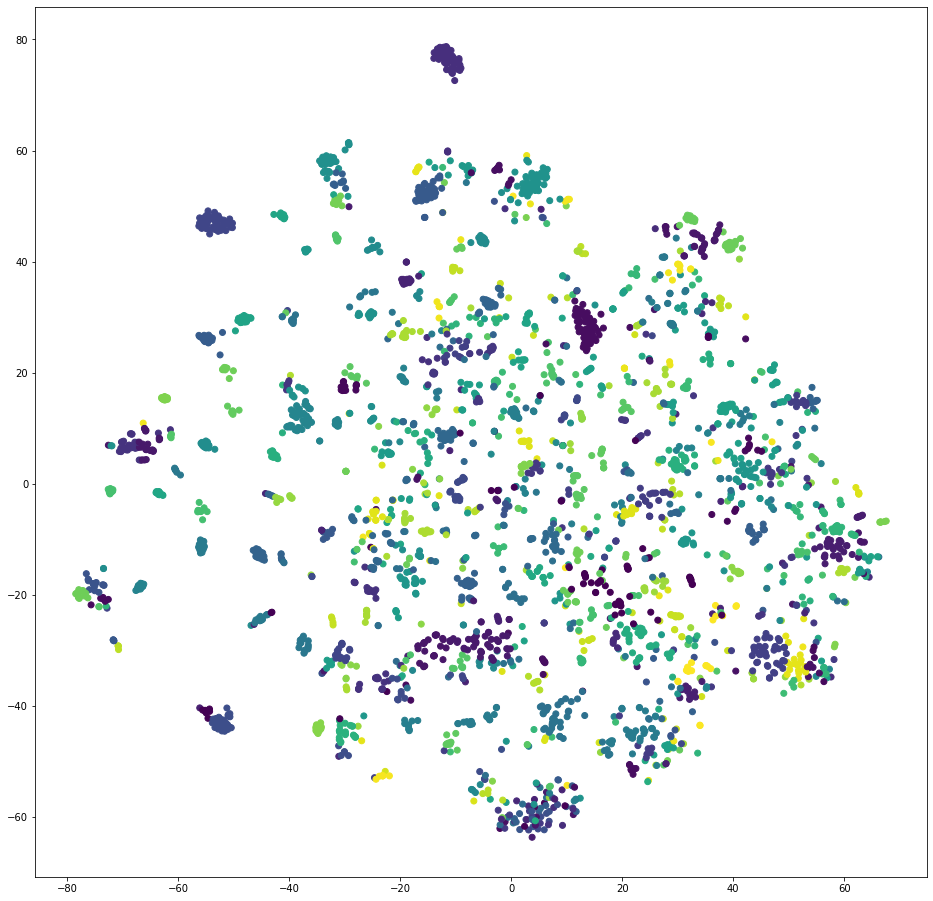

In [137]:
kmeans=KMeans(n_clusters=500, init='k-means++')
kmeans.fit(actor_embeddings)
labels=kmeans.labels_

from sklearn.manifold import TSNE

trans=TSNE(n_components=2)
node_2d=trans.fit_transform(actor_embeddings)

plt.figure(figsize=(20,16))
plt.axes().set(aspect='equal')
plt.scatter(node_2d[:,0], node_2d[:,1], c=labels.astype(float))
plt.show()

<font color='blue'>Grouping similar movies</font>

In [136]:
num_of_clusters=[3, 5, 10, 30, 50, 100, 200, 500]
for i in num_of_clusters:
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(np.array(movie_embeddings))
    labels=kmeans.labels_
    cost_1=0
    cost_2=0
    for j in range(i):
        ld=[]
        actor_cluster=set()
        movie_cluster=set()
        for index, label in enumerate(labels):
            if label==j:
                ld.append(nx.ego_graph(B,movie_nodes[index]).edges)
        all_edges = [tuple(k) for l in range(len(ld)) for k in ld[l]]

        for k,l in all_edges:
            if 'm' in k:
                movie_cluster.add(k)
                actor_cluster.add(l)
            else:
                actor_cluster.add(k)
                actor_cluster.add(l)
        
        
        sub_graph= nx.Graph()
        sub_graph.add_nodes_from(movie_cluster, bipartite=0) # Add the node attribute "bipartite"
        sub_graph.add_nodes_from(actor_cluster, bipartite=1)
        sub_graph.add_edges_from(all_edges)

        conn_components = [sub_graph.subgraph(c) for c in nx.connected_components(sub_graph)]
        cost_1+=cost1(sub_graph,i)
        cost_2+=cost2(sub_graph,i)
    cost_1/=i
    cost_2/=i
    print('For k={} the value of cost is {}'.format(i, cost_1*cost_2))

For k=3 the value of cost is 0.9363361177040106
For k=5 the value of cost is 0.34537289867211995
For k=10 the value of cost is 0.08286889479695797
For k=30 the value of cost is 0.01376322668729961
For k=50 the value of cost is 0.005687533736118383
For k=100 the value of cost is 0.0013923932385089246
For k=200 the value of cost is 0.00031599416165064735
For k=500 the value of cost is 4.1782010506314474e-05


Optimal number of clusters for max cost are 500

<font color='blue'>Displaying similar movie clusters</font>

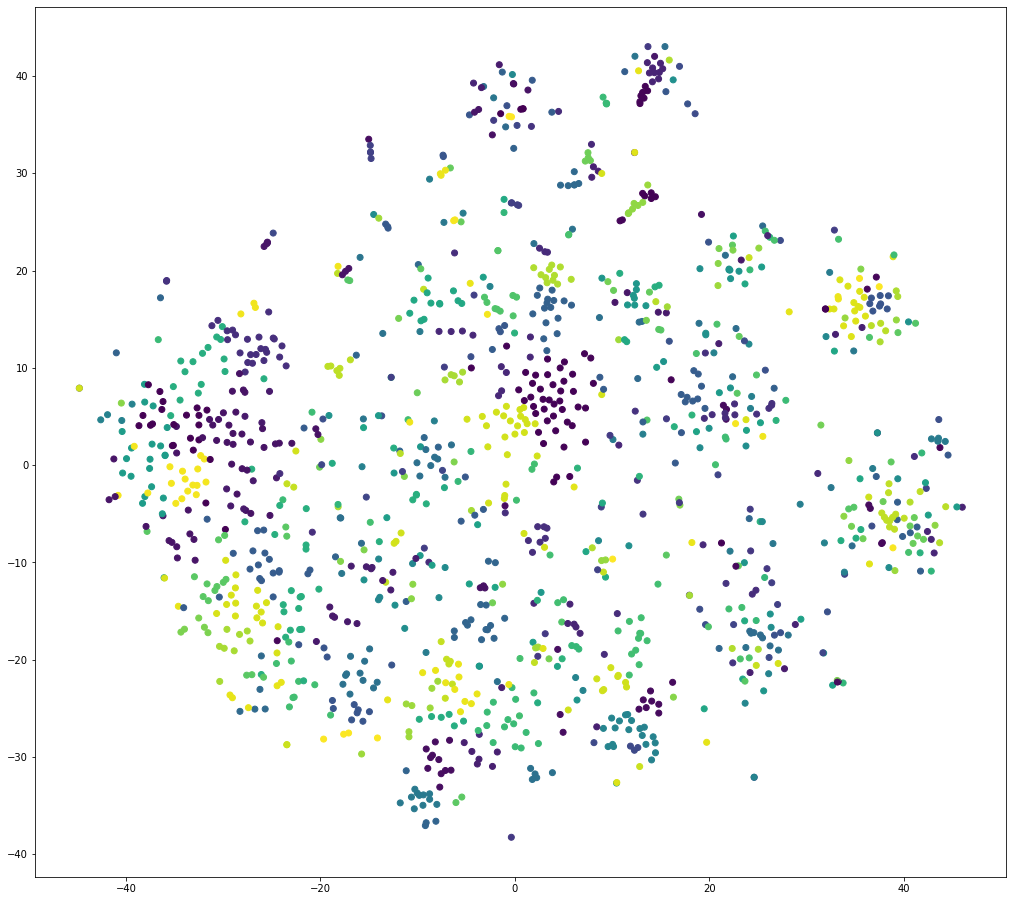

In [138]:
kmeans=KMeans(n_clusters=500, init='k-means++')
kmeans.fit(movie_embeddings)
labels=kmeans.labels_

from sklearn.manifold import TSNE

trans=TSNE(n_components=2)
node_2d=trans.fit_transform(movie_embeddings)

plt.figure(figsize=(20,16))
plt.axes().set(aspect='equal')
plt.scatter(node_2d[:,0], node_2d[:,1], c=labels.astype(float))
plt.show()